**Perceptron Models**

Application of the **Perceptron Model** to the Iris Classification

In [ ]:
# Load required libraries
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
# Load the iris dataset
iris = datasets.load_iris()

# Create our X and y data
X = X = iris.data[:, [0, 2]]
y = iris.target
# View the first five observations of our y data
y[:5]

array([0, 0, 0, 0, 0])

In [ ]:
# View the first five observations of our x data.
# Notice that there are four independent variables (features)
X[:5]

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4]])

In [ ]:
# Split the data into 70% training data and 30% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Train the scaler, which standarizes all the features to have mean=0 and unit variance
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [ ]:
# Apply the scaler to the X training data
X_train_std = sc.transform(X_train)

# Apply the SAME scaler to the X test data
X_test_std = sc.transform(X_test)

In [ ]:
# Create a perceptron object with the parameters: 40 iterations (epochs) over the data, and a learning rate of 0.1
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=0)

# Train the perceptron
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, max_iter=40)

In [ ]:
# Apply the trained perceptron on the X data to make predicts for the y test data
y_pred = ppn.predict(X_test_std)

In [ ]:
# View the predicted y test data
y_pred

array([2, 1, 2, 0, 0, 2, 1, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1,
       2, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 0, 0,
       2])

In [ ]:
# View the true y test data
y_test

array([2, 1, 2, 0, 0, 1, 1, 1, 2, 0, 2, 0, 1, 0, 2, 1, 2, 0, 2, 0, 2, 1,
       1, 0, 0, 1, 2, 0, 2, 0, 0, 1, 0, 2, 0, 2, 1, 2, 1, 2, 0, 0, 0, 0,
       2])

In [ ]:
# View the accuracy of the model, which is: 1 - (observations predicted wrong / total observations)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Actuals: ' + str(y))
print('Predictions: ' + str(ppn.predict(X)))

Accuracy: 0.844
Actuals: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Predictions: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
print('X1 coefficient:' + str(ppn.coef_[0,0]))
print('X2 coefficient:' + str(ppn.coef_[0,1]))
print('Intercept:' + str(ppn.intercept_))

X1 coefficient:0.008750580796029833
X2 coefficient:-0.2501881529988663
Intercept:[-2.00000000e-01 -2.77555756e-17 -3.00000000e-01]


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


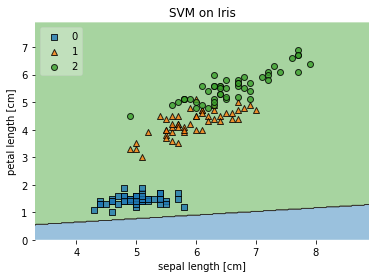

In [ ]:
X = iris.data[:, [0, 2]]
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
# Plotting decision regions
plot_decision_regions(X, y, clf=ppn, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')
plt.show()

**Perceptron Models with PyTorch**

In [ ]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1,1)
    def forward(self, x):
        x = self.fc1(x)
        return x

In [ ]:
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=1, out_features=1, bias=True)
)


In [ ]:
print(list(net.parameters()))

[Parameter containing:
tensor([[-0.9143]], requires_grad=True), Parameter containing:
tensor([0.8199], requires_grad=True)]


In [ ]:
input = Variable(torch.randn(1,1,1), requires_grad=True)
print(input)

tensor([[[0.0211]]], requires_grad=True)


In [ ]:
out = net(input)
print(out)

tensor([[[0.8005]]], grad_fn=<AddBackward0>)


In [ ]:
import torch.optim as optim
def criterion(out, label):
    return (label - out)**2
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.5)

In [ ]:
data = [(1,3), (2,6), (3,9), (4,12), (5,15), (6,18)]

In [ ]:
for epoch in range(100):
    for i, data2 in enumerate(data):
        X, Y = iter(data2)
        X, Y = Variable(torch.FloatTensor([X]), requires_grad=True), Variable(torch.FloatTensor([Y]), requires_grad=False)
        optimizer.zero_grad()
        outputs = net(X)
        loss = criterion(outputs, Y)
        loss.backward()
        optimizer.step()
        if (i % 10 == 0):
            print("Epoch {} - loss: {}".format(epoch, loss.data[0]))

Epoch 0 - loss: 9.575798034667969
Epoch 1 - loss: 5.733334541320801
Epoch 2 - loss: 1.5531299114227295
Epoch 3 - loss: 2.276597023010254
Epoch 4 - loss: 1.7383053302764893
Epoch 5 - loss: 1.6657661199569702
Epoch 6 - loss: 1.465600609779358
Epoch 7 - loss: 1.330661416053772
Epoch 8 - loss: 1.1941308975219727
Epoch 9 - loss: 1.076246738433838
Epoch 10 - loss: 0.9684478640556335
Epoch 11 - loss: 0.871964156627655
Epoch 12 - loss: 0.7849202156066895
Epoch 13 - loss: 0.706622838973999
Epoch 14 - loss: 0.6361167430877686
Epoch 15 - loss: 0.5726523399353027
Epoch 16 - loss: 0.5155164003372192
Epoch 17 - loss: 0.4640834927558899
Epoch 18 - loss: 0.41778022050857544
Epoch 19 - loss: 0.37609753012657166
Epoch 20 - loss: 0.3385739028453827
Epoch 21 - loss: 0.3047935366630554
Epoch 22 - loss: 0.2743838131427765
Epoch 23 - loss: 0.24700778722763062
Epoch 24 - loss: 0.2223638892173767
Epoch 25 - loss: 0.2001781463623047
Epoch 26 - loss: 0.18020591139793396
Epoch 27 - loss: 0.16222639381885529
Epoch

In [ ]:
print(list(net.parameters()))

[Parameter containing:
tensor([[2.9981]], requires_grad=True), Parameter containing:
tensor([0.0106], requires_grad=True)]


In [ ]:
print(net(Variable(torch.Tensor([[[1]]]))))

tensor([[[3.0087]]], grad_fn=<AddBackward0>)


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1,10)
        self.fc2 = nn.Linear(10,1)
    def forward(self, x):
        x = self.fc2(self.fc1(x))
        return x

In [ ]:
net = Net()
net.cuda()

Net(
  (fc1): Linear(in_features=1, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
X, Y = Variable(torch.FloatTensor([X]), requires_grad=True).cuda(), Variable(torch.FloatTensor([Y])).cuda()

In [ ]:
print(X)

tensor([6.], device='cuda:0', grad_fn=<ToCopyBackward0>)


In [ ]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


**Perceptron with PyTorch**

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1,1)
        self.fc2 = nn.Linear(1,1)
    def forward(self, x):
        x = F.relu(self.fc2(F.relu(self.fc1(x))))
        return x
criterion = nn.MSELoss()

In [ ]:
print(list(net.parameters()))

[Parameter containing:
tensor([[-0.5994],
        [ 0.3813],
        [ 0.1363],
        [-0.7928],
        [-0.6986],
        [-0.1728],
        [ 0.7130],
        [ 0.1518],
        [ 0.4587],
        [ 0.1482]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([ 0.0914,  0.3579, -0.7815,  0.5839,  0.9645,  0.8792,  0.2566, -0.8172,
         0.1309,  0.4577], device='cuda:0', requires_grad=True), Parameter containing:
tensor([[ 0.0146, -0.3065,  0.1497, -0.1994,  0.0664, -0.2279, -0.1071,  0.2550,
         -0.1572, -0.2645]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.1793], device='cuda:0', requires_grad=True)]
